In [62]:
import pandas as pd
import numpy as np
from fbprophet import Prophet #Facebook package for forecasting time series data
import matplotlib.pyplot as plt
 
%matplotlib inline
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

In [8]:
cd BAIS/DM/Group_Project/

[WinError 3] The system cannot find the path specified: 'BAIS/DM/Group_Project/'
E:\BAIS\DM\Group_Project


In [63]:
bitcoin_df = pd.read_csv('bitcoin_market_analysis.csv',parse_dates=['Date'],usecols=['Date','Close'])

In [ ]:
#For the prophet to work we need to change the columnto 'ds' and 'y'. For that purpose we are creating new dataframe and keeping the old one handy

In [64]:
df = bitcoin_df.reset_index()

In [ ]:
#Let rename the column in the newly created dataframe.fbprophet takes the column 'ds' as non-index column

In [65]:
df=df.rename(columns={'Date':'ds', 'Close':'y'})

In [ ]:
#Lets plot the close value of data against the Date 

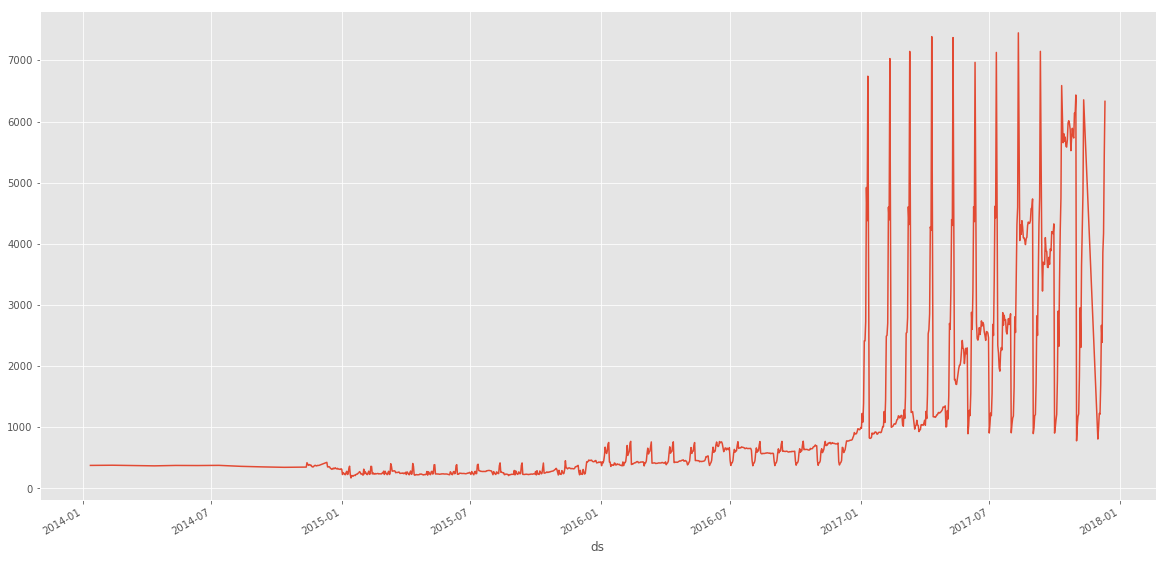

In [66]:
df.set_index('ds').y.plot()

In [ ]:
# To get rid of the anamolies or any other outliers facebook's prophet example uses log-transform to get rid of these anamolies nd outliers. 
#So here in our case  we will use the same. Additionally, it is easy to reverse it to get the original data.

In [67]:
df['y'] = np.log(df['y'])

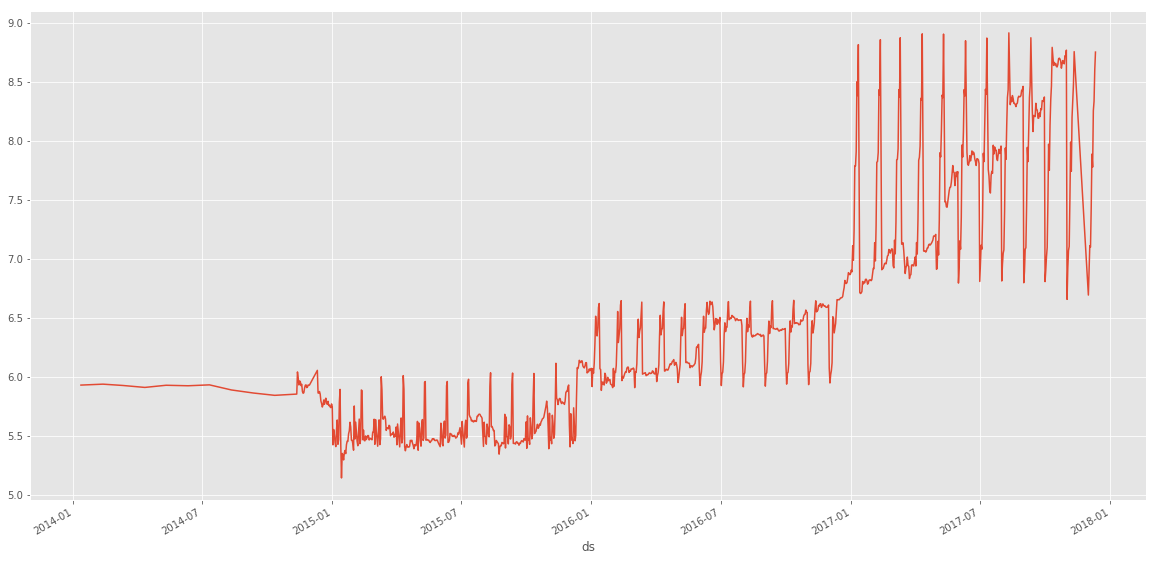

In [68]:
df.set_index('ds').y.plot()

In [ ]:
#Creating prophet model

In [69]:
model = Prophet(daily_seasonality=True)

In [ ]:
#Fitting the Bitcoin market analysis data in the model

In [70]:
model.fit(df);

In [ ]:
#We want to forecast 1 years into the future. So here in our case we take the period as 365 and frequency as D i.e Daily

In [71]:
future = model.make_future_dataframe(periods=365,freq = 'D')

In [72]:
future.tail()

,ds
1454,2018-12-07
1455,2018-12-08
1456,2018-12-09
1457,2018-12-10
1458,2018-12-11


In [ ]:
# To run the model we need to use the predict method of the model object.

In [73]:
forecast = model.predict(future)

In [74]:
forecast.head()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,daily,daily_lower,daily_upper,seasonal,...,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
0,2014-01-12,5.958363,5.958363,5.958363,5.768618,6.568151,0.123753,0.123753,0.123753,0.206856,...,0.206856,0.206856,0.206856,-0.006674,-0.006674,-0.006674,0.089777,0.089777,0.089777,6.165219
1,2014-02-12,5.917775,5.917775,5.917775,5.715113,6.580969,0.123753,0.123753,0.123753,0.246575,...,0.246575,0.246575,0.246575,-0.005460,-0.005460,-0.005460,0.128283,0.128283,0.128283,6.164350
2,2014-03-12,5.881116,5.881116,5.881116,5.690604,6.480587,0.123753,0.123753,0.123753,0.187051,...,0.187051,0.187051,0.187051,-0.005460,-0.005460,-0.005460,0.068759,0.068759,0.068759,6.068167
3,2014-04-12,5.840529,5.840529,5.840529,5.552549,6.361079,0.123753,0.123753,0.123753,0.108915,...,0.108915,0.108915,0.108915,-0.001338,-0.001338,-0.001338,-0.013499,-0.013499,-0.013499,5.949444
4,2014-05-12,5.801250,5.801250,5.801250,5.545613,6.361785,0.123753,0.123753,0.123753,0.147506,...,0.147506,0.147506,0.147506,0.005657,0.005657,0.005657,0.018096,0.018096,0.018096,5.948756


In [ ]:
# Here we need to narrow down the columns to  yhat', yhat_lower, yhat_upper to do our analysis

In [75]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1454,2018-12-07,9.930451,9.449718,10.422319
1455,2018-12-08,9.944058,9.480141,10.394666
1456,2018-12-09,9.949475,9.458067,10.425367
1457,2018-12-10,9.976277,9.522799,10.429503
1458,2018-12-11,9.996644,9.546622,10.478868


In [ ]:
# Prophet has a plotting method which plots the original data represented by black dots, the predicted value represented by blue line and 
#the error of the forecast represented by the blue shaded area

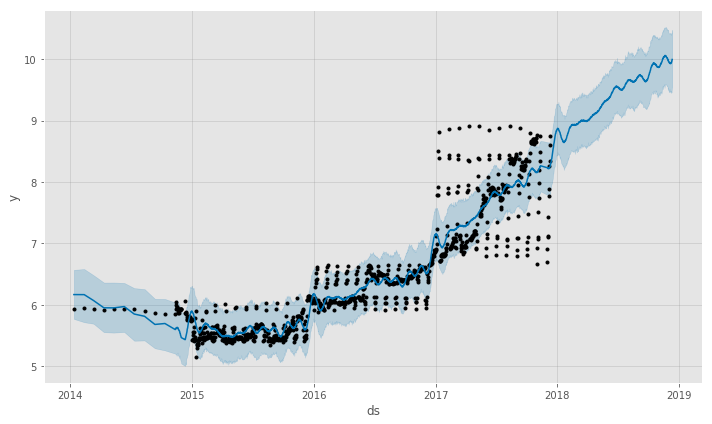

In [76]:
model.plot(forecast);

In [ ]:
#Below  we create a dataframe which combines output of the prophet with our original dataset 

In [35]:
bitcoin_df.set_index('Date', inplace=True)

In [43]:
forecast.set_index('ds', inplace=True)

In [ ]:
#Combining original data and forecasted model data

In [114]:
viz_df = bitcoin_df.join(forecast[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')

In [116]:
viz_df.head()

,Close,yhat,yhat_lower,yhat_upper
2014-01-12,376.53,6.165219,5.768618,6.568151
2014-02-12,379.52,6.164350,5.715113,6.580969
2014-03-12,375.33,6.068167,5.690604,6.480587
2014-04-12,369.16,5.949444,5.552549,6.361079
2014-05-12,376.00,5.948756,5.545613,6.361785


In [ ]:
#Here we reverse the log-transformed value into the original value using numpy's exponential function

In [47]:
viz_df['yhat_rescaled'] = np.exp(viz_df['yhat'])

In [48]:
viz_df.head()

,Close,yhat,yhat_lower,yhat_upper,yhat_rescaled
2014-01-12,376.53,6.165219,5.729808,6.584601,475.905134
2014-02-12,379.52,6.164350,5.737149,6.590524,475.492082
2014-03-12,375.33,6.068167,5.656294,6.478886,431.888467
2014-04-12,369.16,5.949444,5.521691,6.379591,383.539949
2014-05-12,376.00,5.948756,5.531787,6.350276,383.276249


In [ ]:
#Lets plot the yhat_rescaled vs the Closing price of Bitcoin

In [ ]:
#Here as seen below the Orange line represent the original Closing price and blue line represent the predicted values

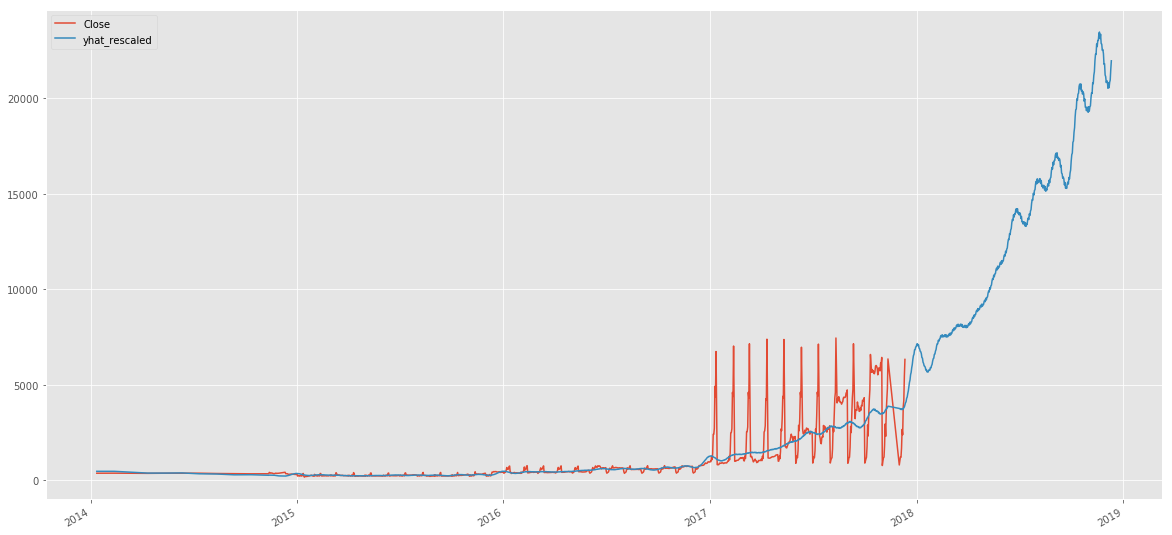

In [49]:
viz_df[['Close', 'yhat_rescaled']].plot()

In [93]:
bitcoin_df.head()

,Date,Close
0,2017-12-11,6330.29
1,2017-11-11,6355.13
2,2017-10-11,6588.18
3,2017-09-11,7148.00
4,2017-08-11,7450.32


In [ ]:
#  From below steps we are trying to plot a graph which shows the actual close price in orange followed by the forecasted close price 

In [95]:
bitcoin_df.set_index('Date', inplace=True)

In [97]:
bitcoin_df.index = pd.to_datetime(bitcoin_df.index) 

In [ ]:
# The connect_date fetches the 2nd last date of the original data set inorder to ensure the original data set and model predicted value are connected

In [100]:
connect_date = bitcoin_df.index[1] # Using connect date we can grab only the model date  after the original dataset date

In [104]:
forecast.set_index('ds', inplace=True)

In [106]:
mask = (forecast.index > connect_date)

In [108]:
predict_df = forecast.loc[mask]

In [109]:
predict_df.head()

,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,daily,daily_lower,daily_upper,seasonal,seasonal_lower,...,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
ds,,,,,,,,,,,,,,,,,,,,,
2017-12-01,8.326964,8.326964,8.326964,7.792789,8.651353,0.123753,0.123753,0.123753,-0.092587,-0.092587,...,-0.092587,-0.092587,-0.092587,-0.007845,-0.007845,-0.007845,-0.208495,-0.208495,-0.208495,8.234377
2017-12-02,8.331659,8.331659,8.331659,7.835368,8.641109,0.123753,0.123753,0.123753,-0.099781,-0.099781,...,-0.099781,-0.099781,-0.099781,-0.001338,-0.001338,-0.001338,-0.222195,-0.222195,-0.222195,8.231878
2017-12-03,8.336354,8.336354,8.336354,7.817584,8.622537,0.123753,0.123753,0.123753,-0.116887,-0.116887,...,-0.116887,-0.116887,-0.116887,-0.006674,-0.006674,-0.006674,-0.233965,-0.233965,-0.233965,8.219467
2017-12-04,8.341048,8.341048,8.341048,7.792671,8.653935,0.123753,0.123753,0.123753,-0.113967,-0.113967,...,-0.113967,-0.113967,-0.113967,0.005657,0.005657,0.005657,-0.243377,-0.243377,-0.243377,8.227081
2017-12-05,8.345743,8.345743,8.345743,7.796276,8.637878,0.123753,0.123753,0.123753,-0.118443,-0.118443,...,-0.118443,-0.118443,-0.118443,0.007850,0.007850,0.007850,-0.250045,-0.250045,-0.250045,8.227300


In [ ]:
# Create dataframe for new visualization

In [110]:
viz_df = bitcoin_df.join(predict_df[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')

In [111]:
viz_df['yhat_scaled']=np.exp(viz_df['yhat'])

In [ ]:
# Here we can see for the future dates we can see the Closing price column has NaN value for the original dataset

In [112]:
viz_df.tail()

,Close,yhat,yhat_lower,yhat_upper,yhat_scaled
2018-12-07,NaN,9.930451,9.449718,10.422319,20546.596280
2018-12-08,NaN,9.944058,9.480141,10.394666,20828.083824
2018-12-09,NaN,9.949475,9.458067,10.425367,20941.223905
2018-12-10,NaN,9.976277,9.522799,10.429503,21510.088683
2018-12-11,NaN,9.996644,9.546622,10.478868,21952.665232


In [ ]:
#Lets plot everything for final visualization

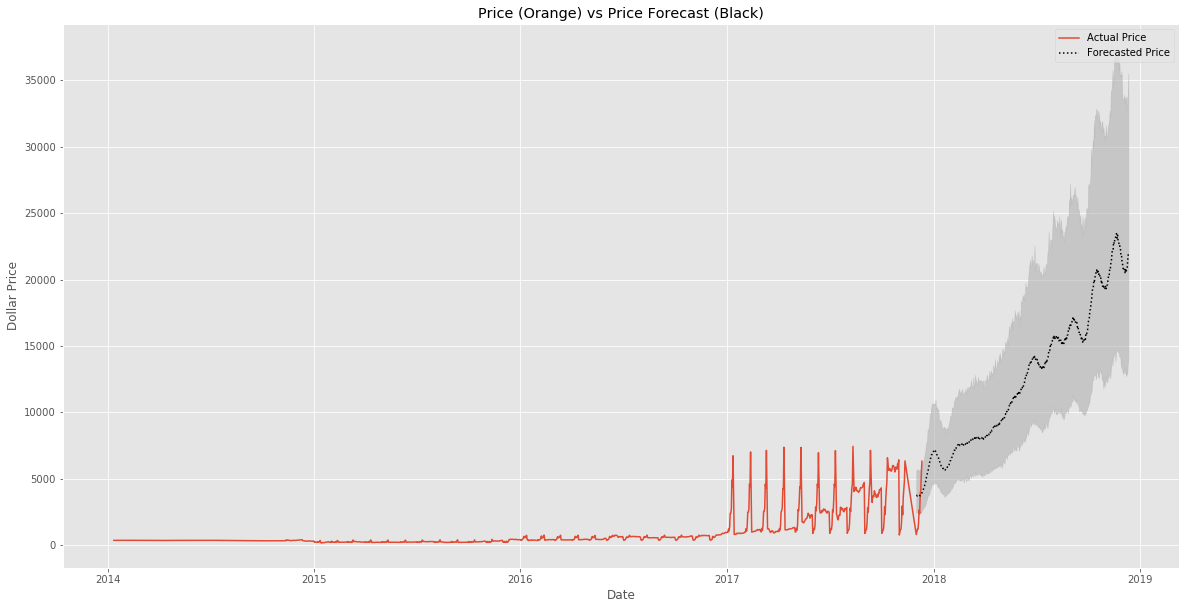

In [113]:
fig, ax1 = plt.subplots()
ax1.plot(viz_df.Close)
ax1.plot(viz_df.yhat_scaled, color='black', linestyle=':')
ax1.fill_between(viz_df.index, np.exp(viz_df['yhat_upper']), np.exp(viz_df['yhat_lower']), alpha=0.5, color='darkgray')
ax1.set_title('Price (Orange) vs Price Forecast (Black)')
ax1.set_ylabel('Dollar Price')
ax1.set_xlabel('Date')

L=ax1.legend() #get the legend
L.get_texts()[0].set_text('Actual Price') #change the legend text for 1st plot
L.get_texts()[1].set_text('Forecasted Price') #change the legend text for 2nd plot